In [1]:
import pandas as pd

# Path of the file to read
titanic_path = './train.csv'

# Read csv data
titanic_data = pd.read_csv(titanic_path, index_col='PassengerId')

titanic_data.shape  # (891, 12)
titanic_data.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',10)

In [4]:
titanic_data.iloc[3:7, [2,4,8]]

,Name,Age,Fare
PassengerId,,,
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
5,"Allen, Mr. William Henry",35.0,8.0500
6,"Moran, Mr. James",NaN,8.4583
7,"McCarthy, Mr. Timothy J",54.0,51.8625


In [5]:
titanic_data.loc[3:7, ['Name', 'Age', 'Fare']]

,Name,Age,Fare
PassengerId,,,
3,"Heikkinen, Miss. Laina",26.0,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
5,"Allen, Mr. William Henry",35.0,8.0500
6,"Moran, Mr. James",NaN,8.4583
7,"McCarthy, Mr. Timothy J",54.0,51.8625


In [6]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
features = ["PassengerId","Survived", "Age", "Age_div"]

def divide_by_age(age):
    if age < 11:
        return 0
    elif age <21:
        return 1
    elif age <31:
        return 2
    elif age <41:
        return 3
    elif age <51:
        return 4
    elif age <61:
        return 5
    elif age <71:
        return 6
    elif age <81:
        return 7
    elif age <91:
        return 8
    elif age <101:
        return 9

titanic_df = pd.DataFrame(titanic_data, columns=features)
titanic_df["Age_div"] = titanic_df['Age'].apply(divide_by_age)

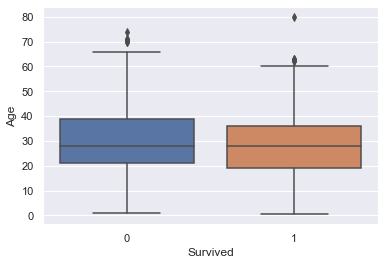

In [8]:
import seaborn as sb
sb.set()
graph = sb.boxplot(x='Survived', y='Age', data=titanic_data)

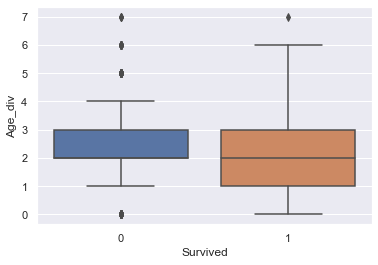

In [9]:
graph = sb.boxplot(x='Survived', y='Age_div', data=titanic_df)

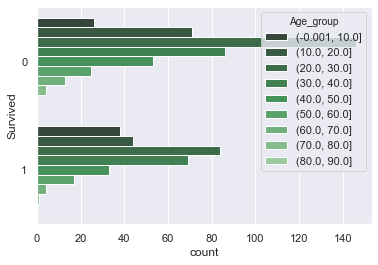

In [10]:
# Otro intento
titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins=[g for g in range(0, 91, 10)], include_lowest=True)
titanic_data.head()
sb.countplot(y='Survived', hue='Age_group', data=titanic_data, palette="Greens_d")

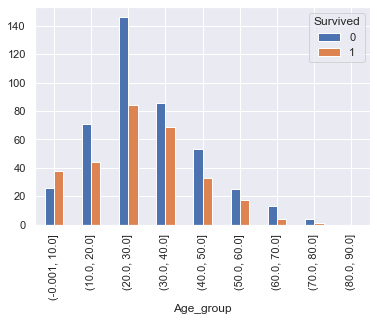

In [11]:
# Otro intento
df=titanic_data.groupby(['Age_group','Survived']).size()
df=df.unstack()
df.plot(kind='bar')

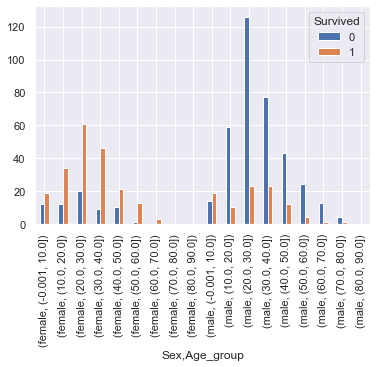

In [12]:
df=titanic_data.groupby(['Sex','Age_group','Survived']).size()
df=df.unstack()
df.plot(kind='bar')

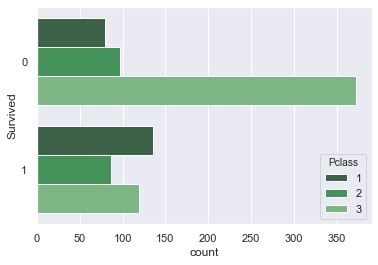

In [13]:
sb.countplot(y='Survived', hue='Pclass', data=titanic_data, palette="Greens_d")

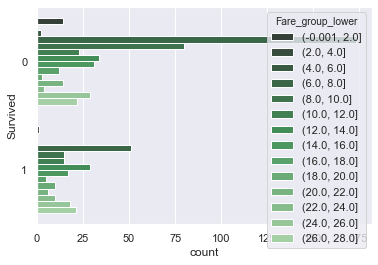

In [14]:
titanic_data['Fare_group_lower'] = pd.cut(titanic_data['Fare'], bins=[g for g in range(0, 30, 2)], include_lowest=True)
sb.countplot(y='Survived', hue='Fare_group_lower', data=titanic_data, palette="Greens_d")

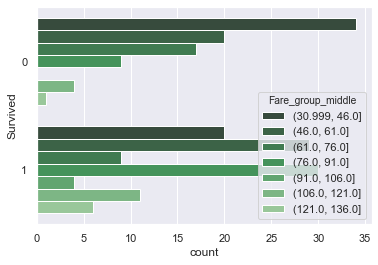

In [15]:
titanic_data['Fare_group_middle'] = pd.cut(titanic_data['Fare'], bins=[g for g in range(31, 150, 15)], include_lowest=True)
sb.countplot(y='Survived', hue='Fare_group_middle', data=titanic_data, palette="Greens_d")

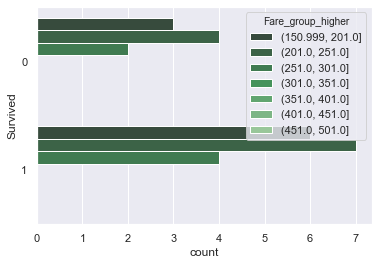

In [16]:
titanic_data['Fare_group_higher'] = pd.cut(titanic_data['Fare'], bins=[g for g in range(151, 521, 50)], include_lowest=True)
sb.countplot(y='Survived', hue='Fare_group_higher', data=titanic_data, palette="Greens_d")

In [17]:
# Ratios

# Sex survival ratio
sex_ratio = titanic_data.groupby("Sex")['Survived'].mean()
# female    0.742038
# male      0.188908

# Class survival ratio
class_ratio = titanic_data.groupby("Pclass")['Survived'].mean()
# 1    0.629630
# 2    0.472826
# 3    0.242363

# Lower fare survival ratio
total_lower = titanic_data[titanic_data['Fare_group_lower'].notnull()].size
surv_lower = titanic_data[(titanic_data['Fare_group_lower'].notnull()) & (titanic_data['Survived'] == 1)].size
ratio_lower_surv = surv_lower/total_lower  # 31% of lower fare survived
# Middle fare survival ratio
total_middle = titanic_data[titanic_data['Fare_group_middle'].notnull()].size
surv_middle = titanic_data[(titanic_data['Fare_group_middle'].notnull()) & (titanic_data['Survived'] == 1)].size
ratio_middle_surv = surv_middle/total_middle  # 56% of middle fare survived
# Higher fare survival ratio
total_higher = titanic_data[titanic_data['Fare_group_higher'].notnull()].size
surv_higher = titanic_data[(titanic_data['Fare_group_higher'].notnull()) & (titanic_data['Survived'] == 1)].size
ratio_higher_surv = surv_higher/total_higher  # 65% of higher fare survived

# Age survival ratio
total = titanic_data.groupby("Age_group")['Survived'].mean()
# (-0.001, 10.0]    0.593750
# (10.0, 20.0]      0.382609
# (20.0, 30.0]      0.365217
# (30.0, 40.0]      0.445161
# (40.0, 50.0]      0.383721
# (50.0, 60.0]      0.404762
# (60.0, 70.0]      0.235294
# (70.0, 80.0]      0.200000
# (80.0, 90.0]           NaN

# Conclusions:
#
# A male that payed a lower fare for a class 3 has very low probabilities to survive
# A female that payed a higher fare for a class 1 has very high probabilities to survive
# 
# Its more probable for a female to survive; the contrary is for a male.
# Its more probable for a class 1 passeger to survive than a class 2, and even more than a class 3.
# Its more probable for someone that payed a higher fare survives than some that payed a middle or, even more, a lower fare.
# Children have high probabilities to survive; the older people have very low chances to survive
# Middle aged men have very low probabilities to survive. Middle aged women have very high probabilities to survive.

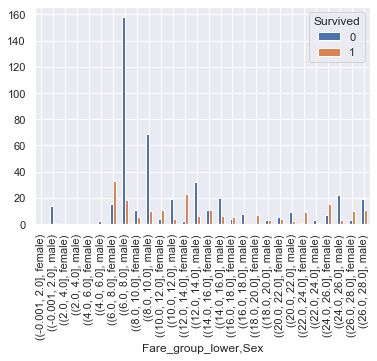

In [18]:
df=titanic_data.groupby(['Fare_group_lower','Sex','Survived']).size()
df=df.unstack()
df.plot(kind='bar')

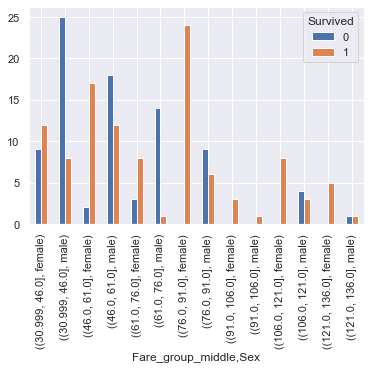

In [19]:
df=titanic_data.groupby(['Fare_group_middle','Sex','Survived']).size()
df=df.unstack()
df.plot(kind='bar')

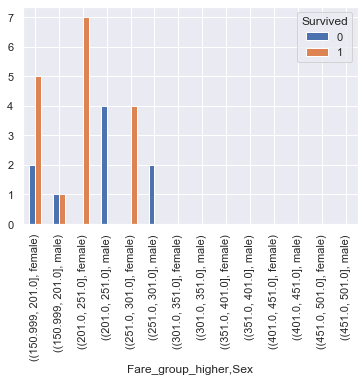

In [20]:
df=titanic_data.groupby(['Fare_group_higher','Sex','Survived']).size()
df=df.unstack()
df.plot(kind='bar')